In [1]:
# Import the required libraries
import pandas as pd # Used for data manipulation and analysis
from sklearn.model_selection import train_test_split # Used for splitting the data into training and testing sets
from sklearn.preprocessing import StandardScaler # Used for feature scaling
from sklearn.linear_model import LogisticRegression # Used for logistic regression model
import numpy as np # Used for numerical computations
import scipy.stats as stats # Used for statistical analysis
import matplotlib.pyplot as plt # Used for data visualization
import seaborn as sns # Used for data visualization
from sklearn.metrics import classification_report # Used for evaluating the performance of the logistic regression model
from sklearn.linear_model import LinearRegression # Used for linear regression model
from sklearn.model_selection import train_test_split # Used for splitting the data into training and testing sets
from sklearn import metrics # Used for evaluating the performance of the linear regression model

In [2]:
# Read in the CSV file containing vaccine data and store it in a Pandas DataFrame
# The DataFrame is assigned to the variable "vaccine"
vaccine = pd.read_csv("OxCGRT_simplified_v1.csv")

/var/folders/r0/jpvr7x216q569bknc6r4kfpm0000gn/T/ipykernel_88242/3320959814.py:3: DtypeWarning: Columns (2,3,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  vaccine = pd.read_csv("OxCGRT_simplified_v1.csv")


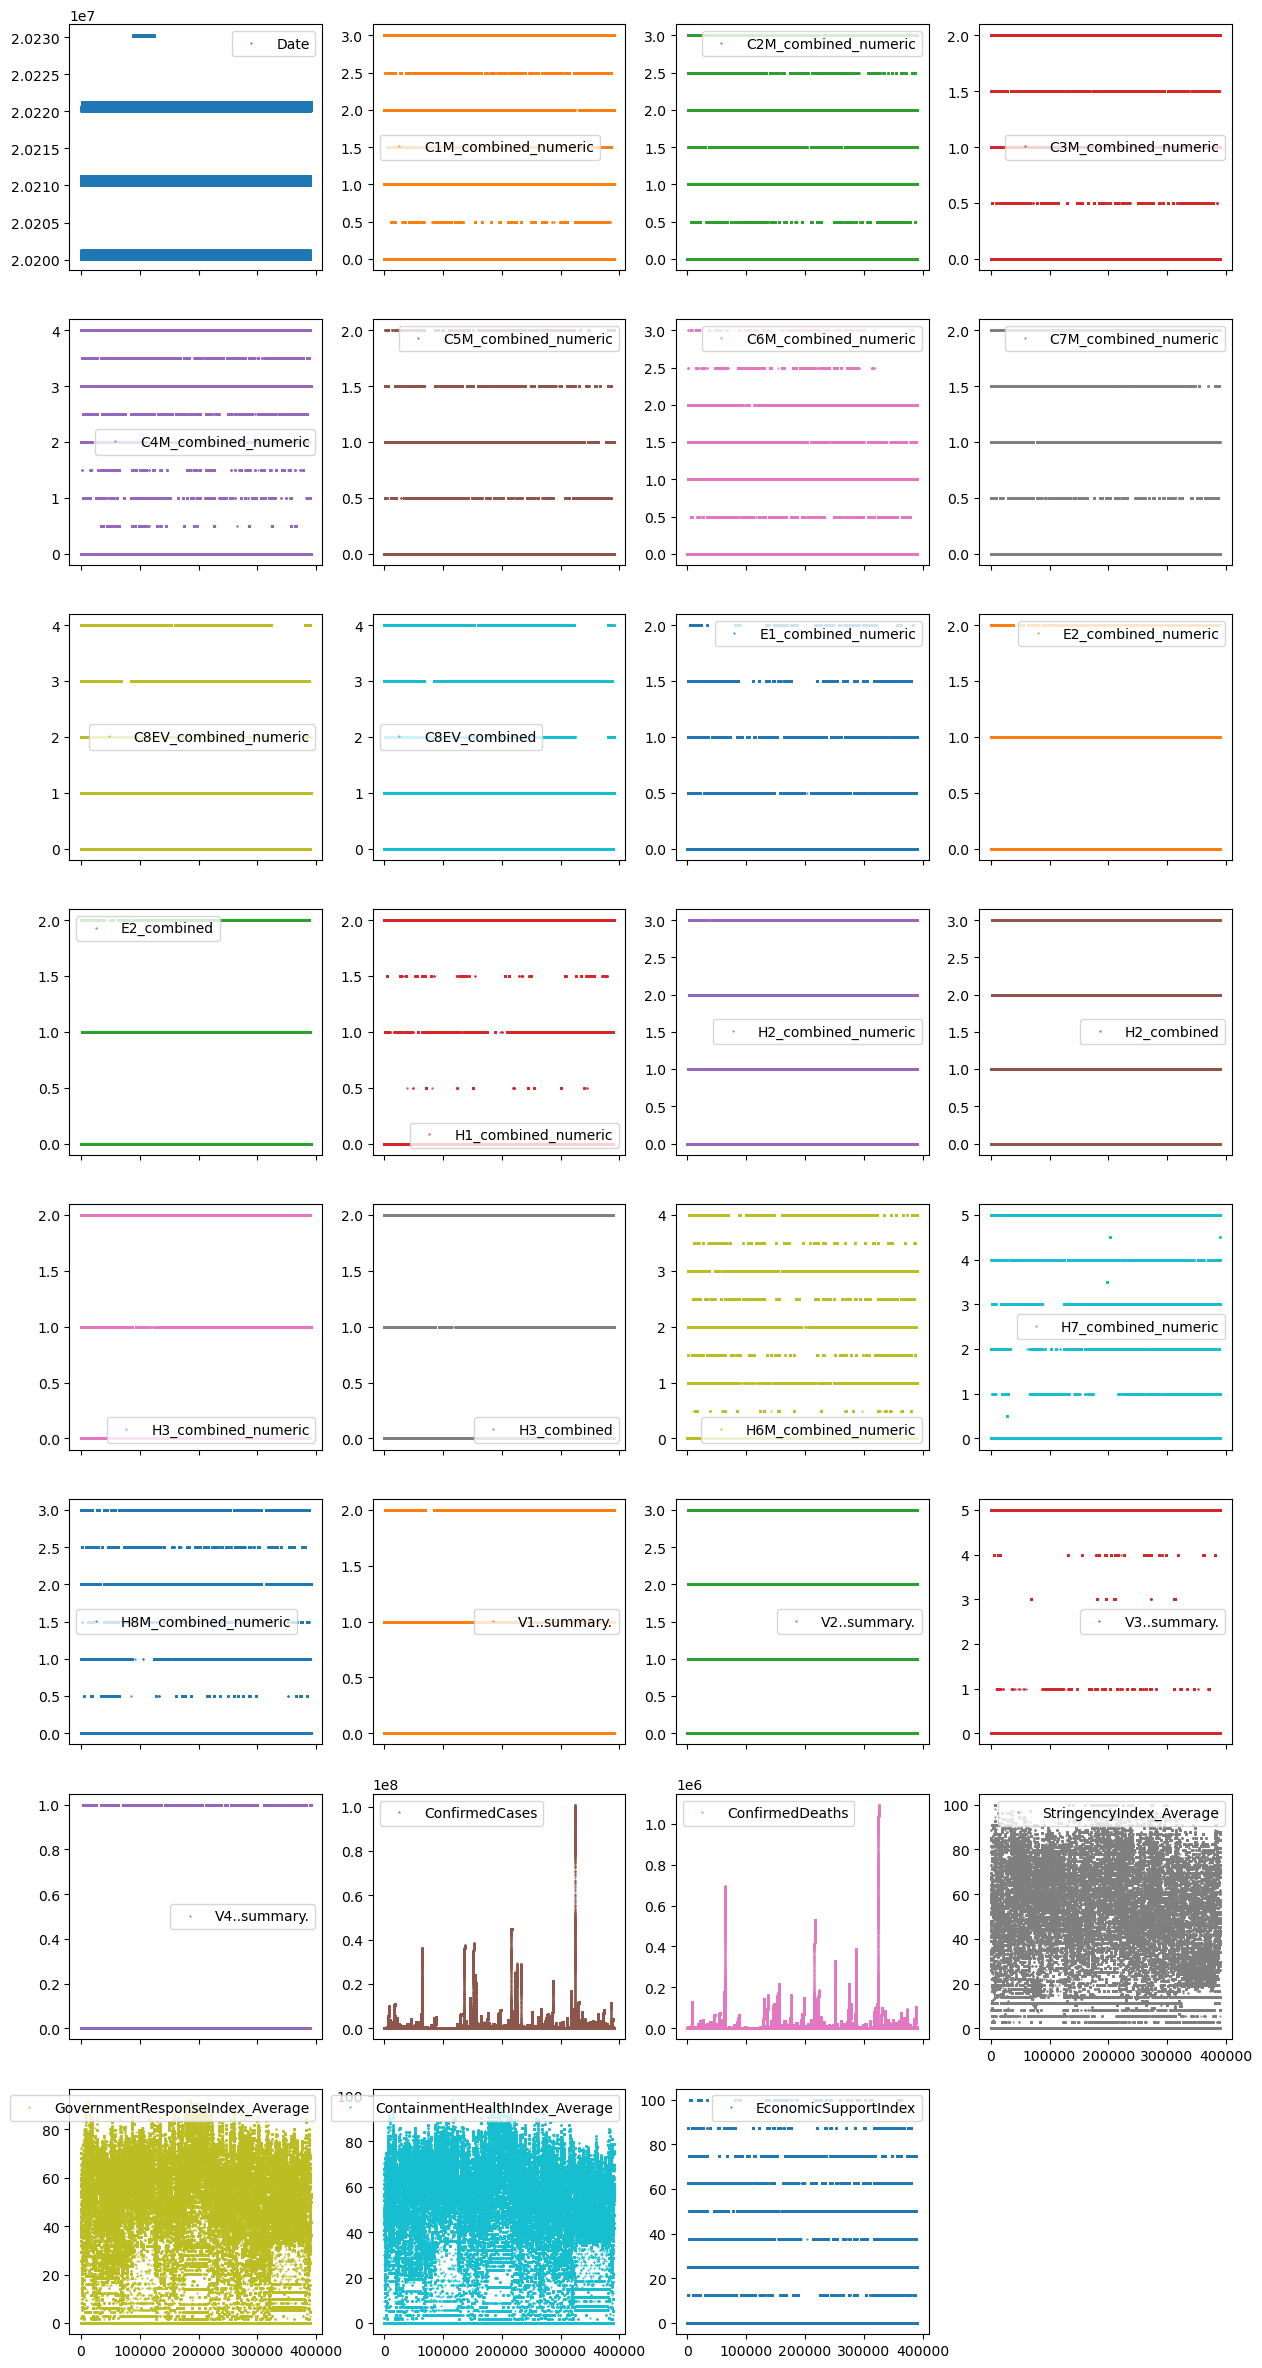

In [3]:
# Plot the vaccine data as points with a layout of 1 row and 4 columns.
# Use a marker size of 1 and line width of 0 to only show the points.
# Set the figure size to 15 by 30 to accommodate all 4 plots.
vaccine.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

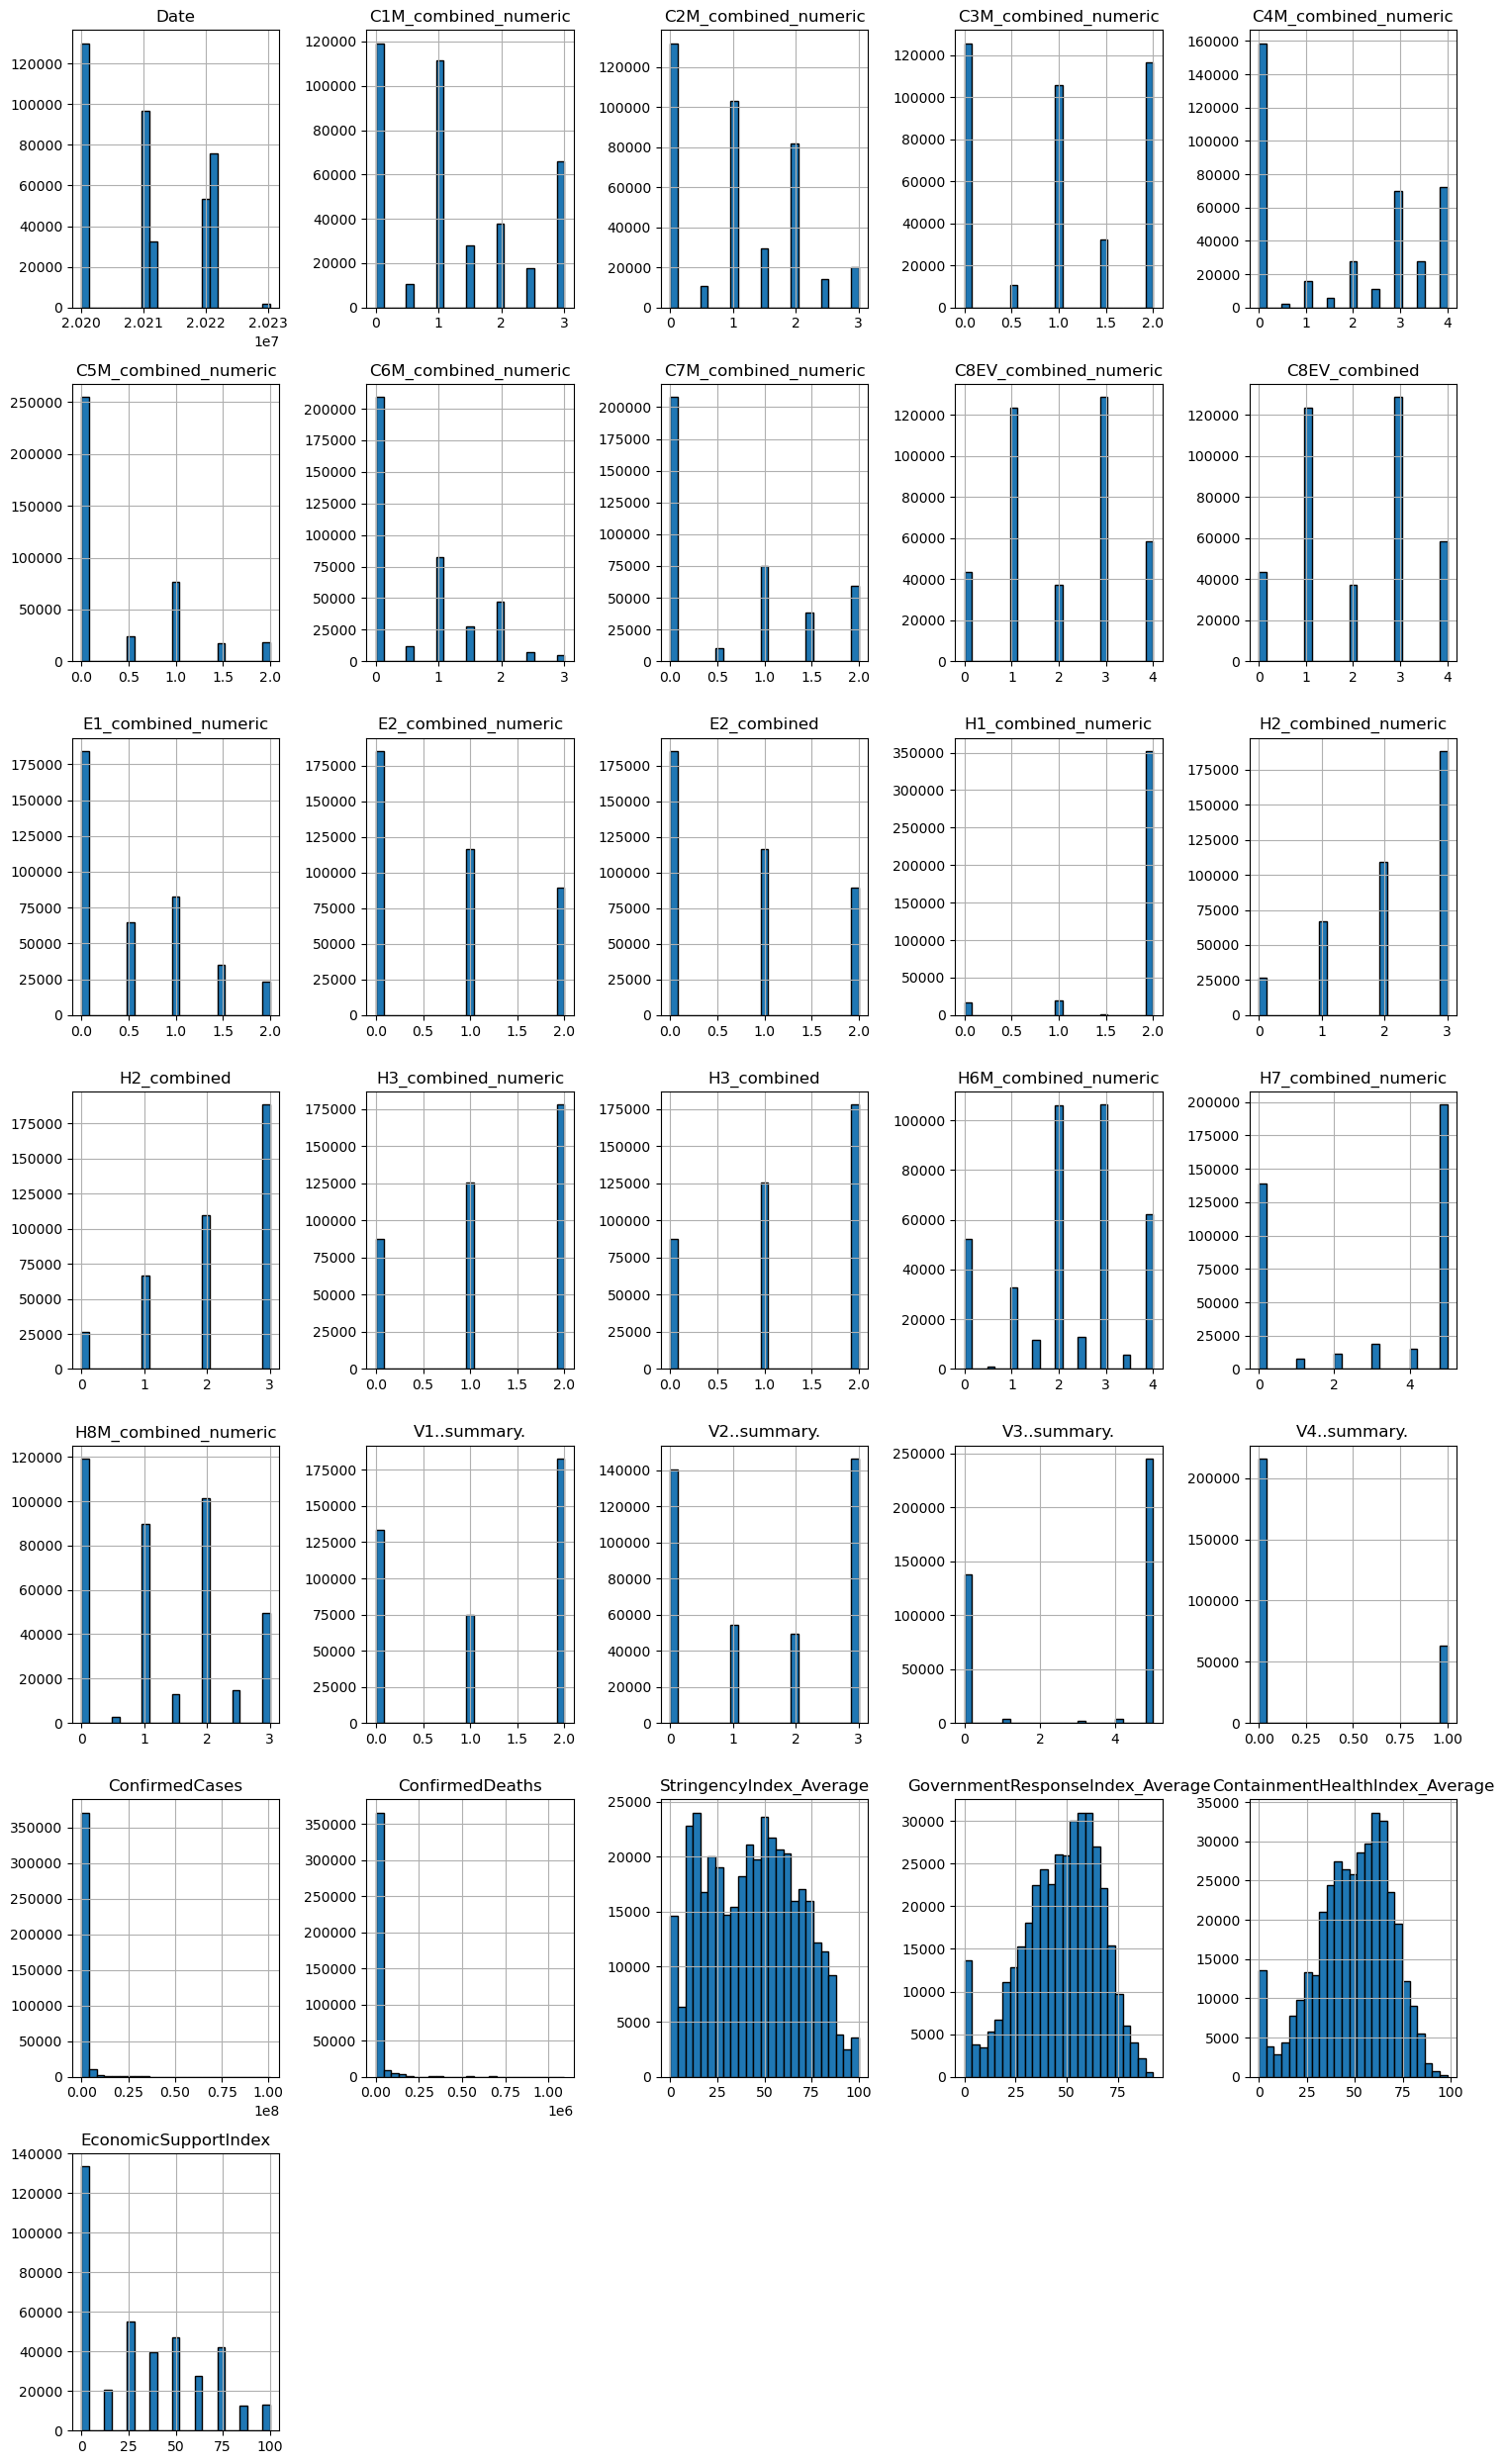

In [4]:
vaccine.hist(bins=25, figsize=(15, 25), layout=(-1, 5),
edgecolor="black")
plt.tight_layout();

In [5]:
# Dropping unnecessary columns related to country and region identifiers, combined measures, and vaccination statistics.
vaccine.drop(['CountryName', 'CountryCode', 'RegionName', 'RegionCode', 'Jurisdiction', 
              'C1M_combined', 'C2M_combined', 'C3M_combined', 'C4M_combined', 
              'C5M_combined', 'C6M_combined', 'C7M_combined', 'C8EV_combined'], 
             axis=1, inplace=True)

# Dropping columns related to specific combined measures and vaccination statistics.
vaccine.drop(['E1_combined', 'E2_combined', 'H1_combined', 'H2_combined', 'H3_combined', 
              'H6M_combined', 'H7_combined', 'H8M_combined', 'MajorityVaccinated'], 
             axis=1, inplace=True)

# Dropping redundant columns for vaccination statistics.
vaccine.drop(['PopulationVaccinated'], axis=1, inplace=True)

# Dropping the column containing date information, as it may not be relevant for further analysis.
vaccine.drop(['Date'], axis=1, inplace=True)


In [6]:
vaccine_corr = vaccine.corr(method="pearson")

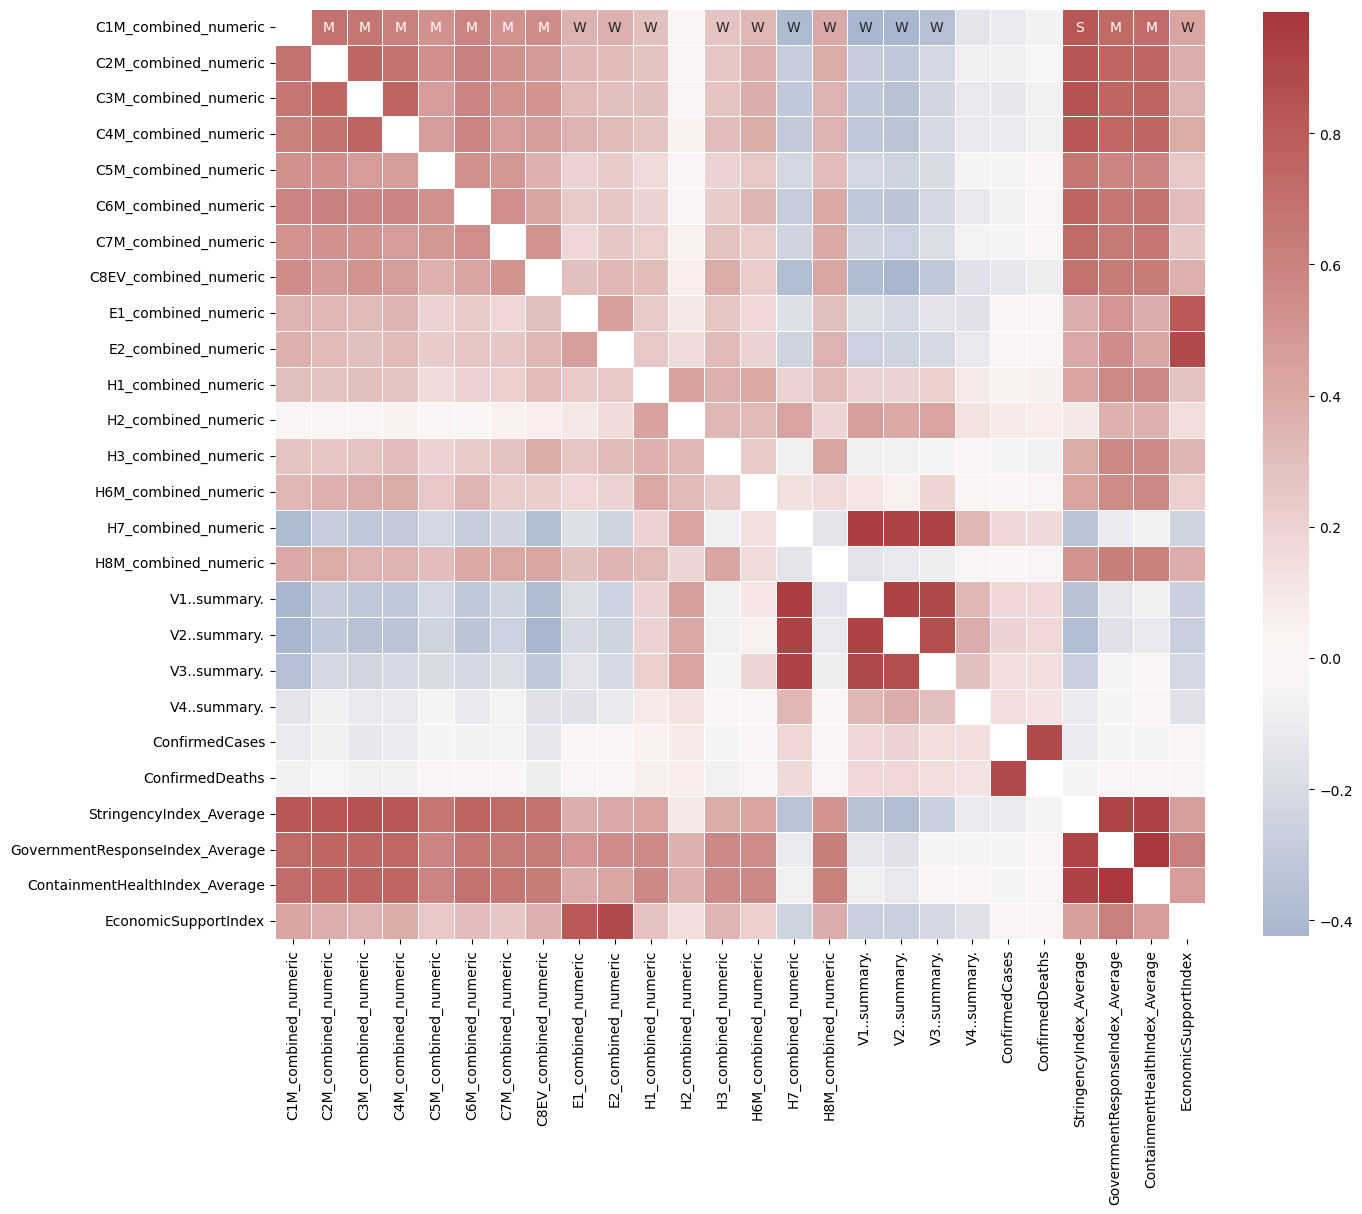

In [7]:
# Create labels for the correlation matrix
labels = np.where(np.abs(vaccine_corr)>0.75, "S",
np.where(np.abs(vaccine_corr)>0.5, "M",
np.where(np.abs(vaccine_corr)>0.25, "W", "")))
# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(vaccine_corr, mask=np.eye(len(vaccine_corr)), square=True,
center=0, annot=labels, fmt='', linewidths=.5,
cmap="vlag", cbar_kws={"shrink": 0.8});

In [8]:
#count the null value 
count_nan = vaccine.isna().sum()
print(count_nan)

C1M_combined_numeric                    0
C2M_combined_numeric                    0
C3M_combined_numeric                    0
C4M_combined_numeric                    0
C5M_combined_numeric                    0
C6M_combined_numeric                    0
C7M_combined_numeric                    0
C8EV_combined_numeric                   0
E1_combined_numeric                     0
E2_combined_numeric                     0
H1_combined_numeric                     0
H2_combined_numeric                     0
H3_combined_numeric                     0
H6M_combined_numeric                    0
H7_combined_numeric                     0
H8M_combined_numeric                    0
V1..summary.                            0
V2..summary.                            0
V3..summary.                            0
V4..summary.                       111805
ConfirmedCases                       1321
ConfirmedDeaths                      1611
StringencyIndex_Average                 0
GovernmentResponseIndex_Average   

In [39]:
vaccine_SI_time_series=pd.read_csv("OxCGRT_timeseries_StringencyIndex_v1.csv")

In [40]:
vaccine_SI_time_series

,CountryCode,CountryName,RegionCode,RegionName,CityCode,CityName,Jurisdiction,01Jan2020,02Jan2020,03Jan2020,...,19Feb2023,20Feb2023,21Feb2023,22Feb2023,23Feb2023,24Feb2023,25Feb2023,26Feb2023,27Feb2023,28Feb2023
0,ABW,Aruba,NaN,NaN,NaN,NaN,NAT_TOTAL,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,NaN,NaN,NaN,NaN,NAT_TOTAL,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,Angola,NaN,NaN,NaN,NaN,NAT_TOTAL,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,Albania,NaN,NaN,NaN,NaN,NAT_TOTAL,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AND,Andorra,NaN,NaN,NaN,NaN,NAT_TOTAL,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,VUT,Vanuatu,NaN,NaN,NaN,NaN,NAT_TOTAL,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391,YEM,Yemen,NaN,NaN,NaN,NaN,NAT_TOTAL,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,ZAF,South Africa,NaN,NaN,NaN,NaN,NAT_TOTAL,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,ZMB,Zambia,NaN,NaN,NaN,NaN,NAT_TOTAL,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
selected_row_india = vaccine_SI_time_series[(vaccine_SI_time_series['CountryName'] == 'India') & (vaccine_SI_time_series['Jurisdiction'] == 'NAT_TOTAL')]
selected_row_usa = vaccine_SI_time_series[(vaccine_SI_time_series['CountryName'] == 'United States') & (vaccine_SI_time_series['Jurisdiction'] == 'NAT_TOTAL')]
selected_row_uk = vaccine_SI_time_series[(vaccine_SI_time_series['CountryName'] == 'United Kingdom') & (vaccine_SI_time_series['Jurisdiction'] == 'NAT_TOTAL')]
selected_row_brazil = vaccine_SI_time_series[(vaccine_SI_time_series['CountryName'] == 'Brazil') & (vaccine_SI_time_series['Jurisdiction'] == 'NAT_TOTAL')]

In [42]:
selected_row_india.drop(selected_row_india.iloc[:, 1:7], inplace=True, axis=1)
selected_row_usa.drop(selected_row_usa.iloc[:, 1:7], inplace=True, axis=1)
selected_row_brazil.drop(selected_row_brazil.iloc[:, 1:7], inplace=True, axis=1)
selected_row_uk.drop(selected_row_uk.iloc[:, 1:7], inplace=True, axis=1)

/var/folders/r0/jpvr7x216q569bknc6r4kfpm0000gn/T/ipykernel_88242/2275625999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_row_india.drop(selected_row_india.iloc[:, 1:7], inplace=True, axis=1)
/var/folders/r0/jpvr7x216q569bknc6r4kfpm0000gn/T/ipykernel_88242/2275625999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_row_usa.drop(selected_row_usa.iloc[:, 1:7], inplace=True, axis=1)
/var/folders/r0/jpvr7x216q569bknc6r4kfpm0000gn/T/ipykernel_88242/2275625999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

In [43]:
selected_row_uk

,CountryCode,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,09Jan2020,...,19Feb2023,20Feb2023,21Feb2023,22Feb2023,23Feb2023,24Feb2023,25Feb2023,26Feb2023,27Feb2023,28Feb2023
183,GBR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df1_transposed_india = selected_row_india.T # or df1.transpose()
df1_transposed_usa = selected_row_usa.T # or df1.transpose()
df1_transposed_brazil = selected_row_brazil.T # or df1.transpose()
df1_transposed_uk = selected_row_uk.T # or df1.transpose()

In [45]:
df1_transposed_uk.isnull()

,183
CountryCode,False
01Jan2020,False
02Jan2020,False
03Jan2020,False
04Jan2020,False
...,...
24Feb2023,True
25Feb2023,True
26Feb2023,True
27Feb2023,True


In [46]:
df_melted_india = pd.melt(selected_row_india, id_vars=[], value_vars=selected_row_india.columns, var_name='column', value_name='value')
df_melted_usa = pd.melt(selected_row_usa, id_vars=[], value_vars=selected_row_usa.columns, var_name='column', value_name='value')
df_melted_brazil = pd.melt(selected_row_brazil, id_vars=[], value_vars=selected_row_brazil.columns, var_name='column', value_name='value')
df_melted_uk = pd.melt(selected_row_uk, id_vars=[], value_vars=selected_row_uk.columns, var_name='column', value_name='value')


In [47]:
India_SI_clean = df_melted_india.dropna()
USA_SI_clean = df_melted_usa.dropna()
Brazil_SI_clean = df_melted_brazil.dropna()
UK_SI_clean = df_melted_uk.dropna()


In [48]:
UK_SI_clean

,column,value
0,CountryCode,GBR
1,01Jan2020,0.0
2,02Jan2020,0.0
3,03Jan2020,0.0
4,04Jan2020,0.0
...,...,...
1092,27Dec2022,5.56
1093,28Dec2022,5.56
1094,29Dec2022,5.56
1095,30Dec2022,5.56


In [49]:
# Delete the first row
India_SI_clean = India_SI_clean.drop(India_SI_clean.index[0])
USA_SI_clean = USA_SI_clean.drop(USA_SI_clean.index[0])
Brazil_SI_clean = Brazil_SI_clean.drop(Brazil_SI_clean.index[0])
UK_SI_clean = UK_SI_clean.drop(UK_SI_clean.index[0])

India_SI_clean

,column,value
1,01Jan2020,0.0
2,02Jan2020,0.0
3,03Jan2020,0.0
4,04Jan2020,0.0
5,05Jan2020,0.0
...,...,...
1092,27Dec2022,28.7
1093,28Dec2022,28.7
1094,29Dec2022,28.7
1095,30Dec2022,28.7


In [51]:
India_SI_clean.reset_index(drop=True)
USA_SI_clean.reset_index(drop=True)
Brazil_SI_clean.reset_index(drop=True)
UK_SI_clean.reset_index(drop=True)

,column,value
0,01Jan2020,0.0
1,02Jan2020,0.0
2,03Jan2020,0.0
3,04Jan2020,0.0
4,05Jan2020,0.0
...,...,...
1091,27Dec2022,5.56
1092,28Dec2022,5.56
1093,29Dec2022,5.56
1094,30Dec2022,5.56


In [52]:
# Delete the first row
India_SI_clean = India_SI_clean.drop(India_SI_clean.index[0])
USA_SI_clean = USA_SI_clean.drop(USA_SI_clean.index[0])
Brazil_SI_clean = Brazil_SI_clean.drop(Brazil_SI_clean.index[0])
UK_SI_clean = Brazil_SI_clean.drop(Brazil_SI_clean.index[0])
#India_SI_clean
#Brazil_SI_clean
UK_SI_clean

,column,value
3,03Jan2020,0.0
4,04Jan2020,0.0
5,05Jan2020,0.0
6,06Jan2020,0.0
7,07Jan2020,0.0
...,...,...
1092,27Dec2022,22.22
1093,28Dec2022,22.22
1094,29Dec2022,22.22
1095,30Dec2022,22.22


In [130]:
#India_SI_clean.set_index('column', inplace=True)
#USA_SI_clean.set_index('column', inplace=True)
#Brazil_SI_clean.set_index('column', inplace=True)

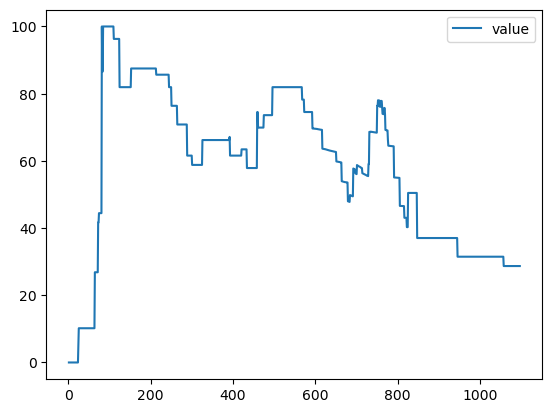

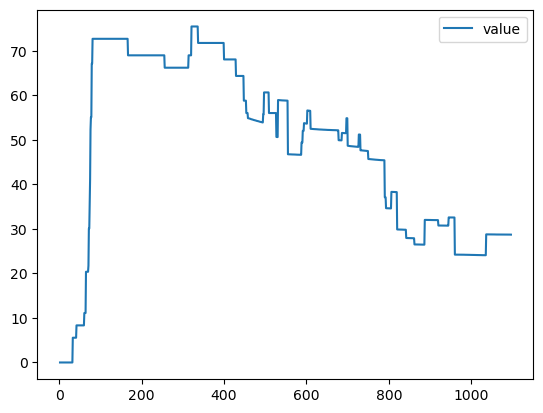

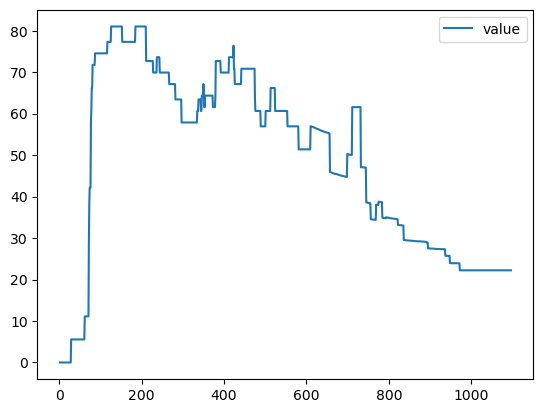

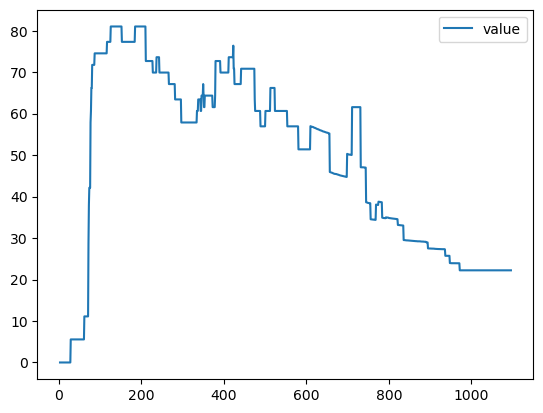

In [53]:
India_SI_clean.plot()
USA_SI_clean.plot()
Brazil_SI_clean.plot()
UK_SI_clean.plot()
plt.show()

In [54]:
stringency_index_India = India_SI_clean.index
stringency_index_USA = USA_SI_clean.index
stringency_index_Brazil = Brazil_SI_clean.index
stringency_index_UK = UK_SI_clean.index

In [57]:
stringency_ts_India = pd.Series(India_SI_clean.squeeze().value, index=stringency_index_India)
stringency_ts_USA = pd.Series(USA_SI_clean.squeeze().value, index=stringency_index_USA)
stringency_ts_Brazil = pd.Series(Brazil_SI_clean.squeeze().value, index=stringency_index_Brazil)
stringency_ts_UK = pd.Series(UK_SI_clean.squeeze().value, index=stringency_index_UK)

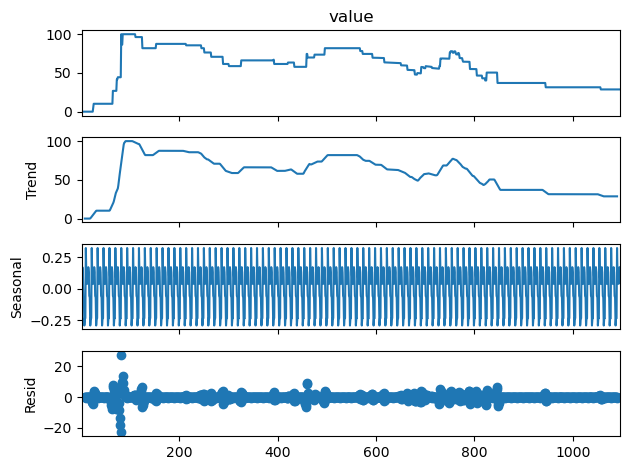

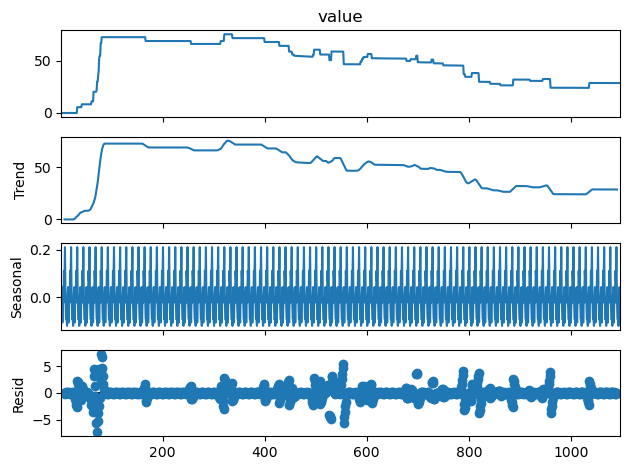

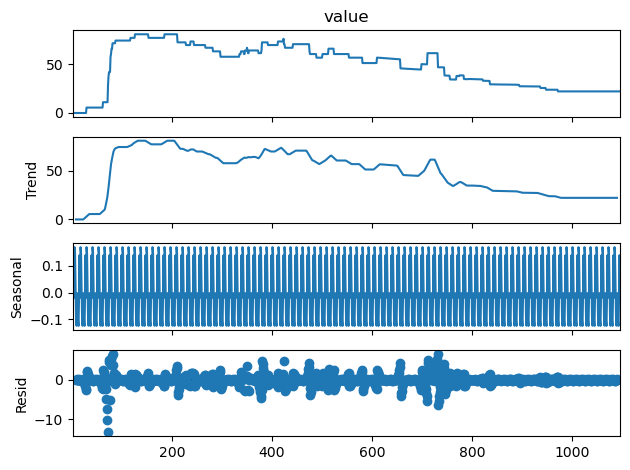

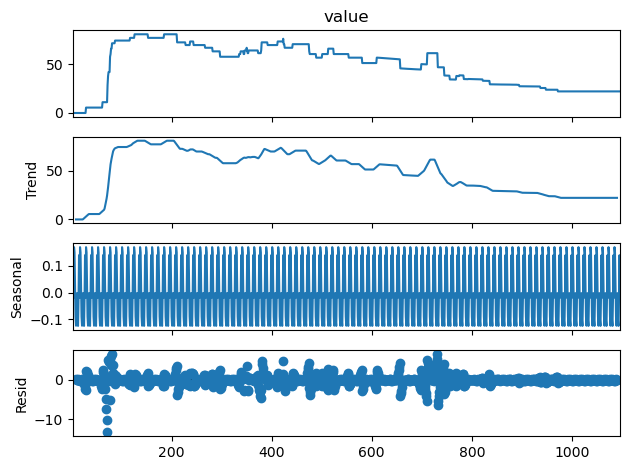

<Figure size 1500x480 with 0 Axes>

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
result_India = seasonal_decompose(stringency_ts_India, model='additive', period = 12)
result_USA = seasonal_decompose(stringency_ts_USA, model='additive', period = 12)
result_Brazil = seasonal_decompose(stringency_ts_Brazil, model='additive', period = 12)
result_UK = seasonal_decompose(stringency_ts_UK, model='additive', period = 12)

result_India.plot()
result_USA.plot()
result_Brazil.plot()
result_UK.plot()

plt.figure().set_figwidth(15)
plt.show()

In [135]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [136]:
vaccine = vaccine.iloc[:, [8, 9,-1]]

In [137]:
vaccine

,E1_combined_numeric,E2_combined_numeric,EconomicSupportIndex
0,0.0,0,0.0
1,0.0,0,0.0
2,0.0,0,0.0
3,0.0,0,0.0
4,0.0,0,0.0
...,...,...,...
390904,0.0,0,0.0
390905,0.0,0,0.0
390906,0.0,0,0.0
390907,0.0,0,0.0


In [138]:
vaccine.isnull().sum()

E1_combined_numeric     0
E2_combined_numeric     0
EconomicSupportIndex    0
dtype: int64

In [142]:
X = vaccine.drop(['EconomicSupportIndex'], axis=1)
y = vaccine['EconomicSupportIndex']

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
models = []
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DecisionTree', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('GradientBoosting', GradientBoostingRegressor()))
models.append(('MLP', MLPRegressor()))
models.append(('XGBoost', XGBRegressor()))

 18%|████████                                    | 2/11 [00:00<00:01,  5.23it/s]

Coefficients for LR:  [25. 25.]
LinearRegression()
	Training time: 0.027s
	Prediction time: 0.001s
	Explained variance: 1.0
	Mean absolute error: 6.348357886889212e-11
	R2 score: 1.0
	Mean Squared Error: 5.451858769533616e-21
	Root Mean Squared Error: 7.383670340375182e-11

Coefficients for Ridge:  [24.99983445 24.99993514]
Ridge()
	Training time: 0.024s
	Prediction time: 0.001s
	Explained variance: 0.9999999999802829
	Mean absolute error: 0.00011656979060435019
	R2 score: 0.9999999999802822
	Mean Squared Error: 1.84571947085102e-08
	Root Mean Squared Error: 0.00013585725857866485



 27%|████████████                                | 3/11 [00:00<00:01,  4.23it/s]

Coefficients for Lasso:  [22.92935695 24.18859114]
Lasso()
	Training time: 0.046s
	Prediction time: 0.001s
	Explained variance: 0.9969150668959943
	Mean absolute error: 1.4580894202125017
	R2 score: 0.9969149671396089
	Mean Squared Error: 2.887802016623034
	Root Mean Squared Error: 1.6993534113370985



 36%|████████████████                            | 4/11 [00:00<00:01,  4.10it/s]

Coefficients for ElasticNet:  [12.73715174 16.10137629]
ElasticNet()
	Training time: 0.033s
	Prediction time: 0.003s
	Explained variance: 0.8285595659718505
	Mean absolute error: 10.927111979730267
	R2 score: 0.8285543382117605
	Mean Squared Error: 160.48487982412746
	Root Mean Squared Error: 12.668262699523067



 45%|████████████████████                        | 5/11 [01:09<02:28, 24.79s/it]

KNeighborsRegressor()
	Training time: 0.081s
	Prediction time: 14.776s
	Explained variance: 1.0
	Mean absolute error: 0.0
	R2 score: 1.0
	Mean Squared Error: 0.0
	Root Mean Squared Error: 0.0



 55%|████████████████████████                    | 6/11 [01:09<01:22, 16.48s/it]

DecisionTreeRegressor()
	Training time: 0.030s
	Prediction time: 0.003s
	Explained variance: 1.0
	Mean absolute error: 0.0
	R2 score: 1.0
	Mean Squared Error: 0.0
	Root Mean Squared Error: 0.0



 64%|████████████████████████████                | 7/11 [02:04<01:55, 28.92s/it]

SVR()
	Training time: 5.091s
	Prediction time: 0.930s
	Explained variance: 0.9999911434621832
	Mean absolute error: 0.09250309449311922
	R2 score: 0.9999901090289857
	Mean Squared Error: 0.009258626191109563
	Root Mean Squared Error: 0.09622175529010871



 73%|████████████████████████████████            | 8/11 [02:27<01:21, 27.26s/it]

RandomForestRegressor()
	Training time: 2.340s
	Prediction time: 0.179s
	Explained variance: 1.0
	Mean absolute error: 0.0
	R2 score: 1.0
	Mean Squared Error: 0.0
	Root Mean Squared Error: 0.0



 82%|████████████████████████████████████        | 9/11 [02:56<00:55, 27.74s/it]

GradientBoostingRegressor()
	Training time: 2.843s
	Prediction time: 0.096s
	Explained variance: 0.9999973588707738
	Mean absolute error: 0.03650487193925271
	R2 score: 0.9999973588707346
	Mean Squared Error: 0.0024722778537209743
	Root Mean Squared Error: 0.049722005729063004



 91%|███████████████████████████████████████    | 10/11 [04:05<00:40, 40.28s/it]

MLPRegressor()
	Training time: 8.853s
	Prediction time: 0.032s
	Explained variance: 0.9999999926873896
	Mean absolute error: 0.0033033359751068465
	R2 score: 0.9999999810300922
	Mean Squared Error: 1.77571326702134e-05
	Root Mean Squared Error: 0.004213921293784852



100%|███████████████████████████████████████████| 11/11 [04:18<00:00, 23.48s/it]

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
	Training time: 1.510s
	Prediction time: 0.006s
	Explained variance: 0.9999999999999863
	Mean absolute error: 2.896869155057386e-06
	R2 score: 0.9999999999999835
	Mean Squared Error: 1.5476472174271006e-11
	Root Mean Squared Error: 3.934014765385484e-06



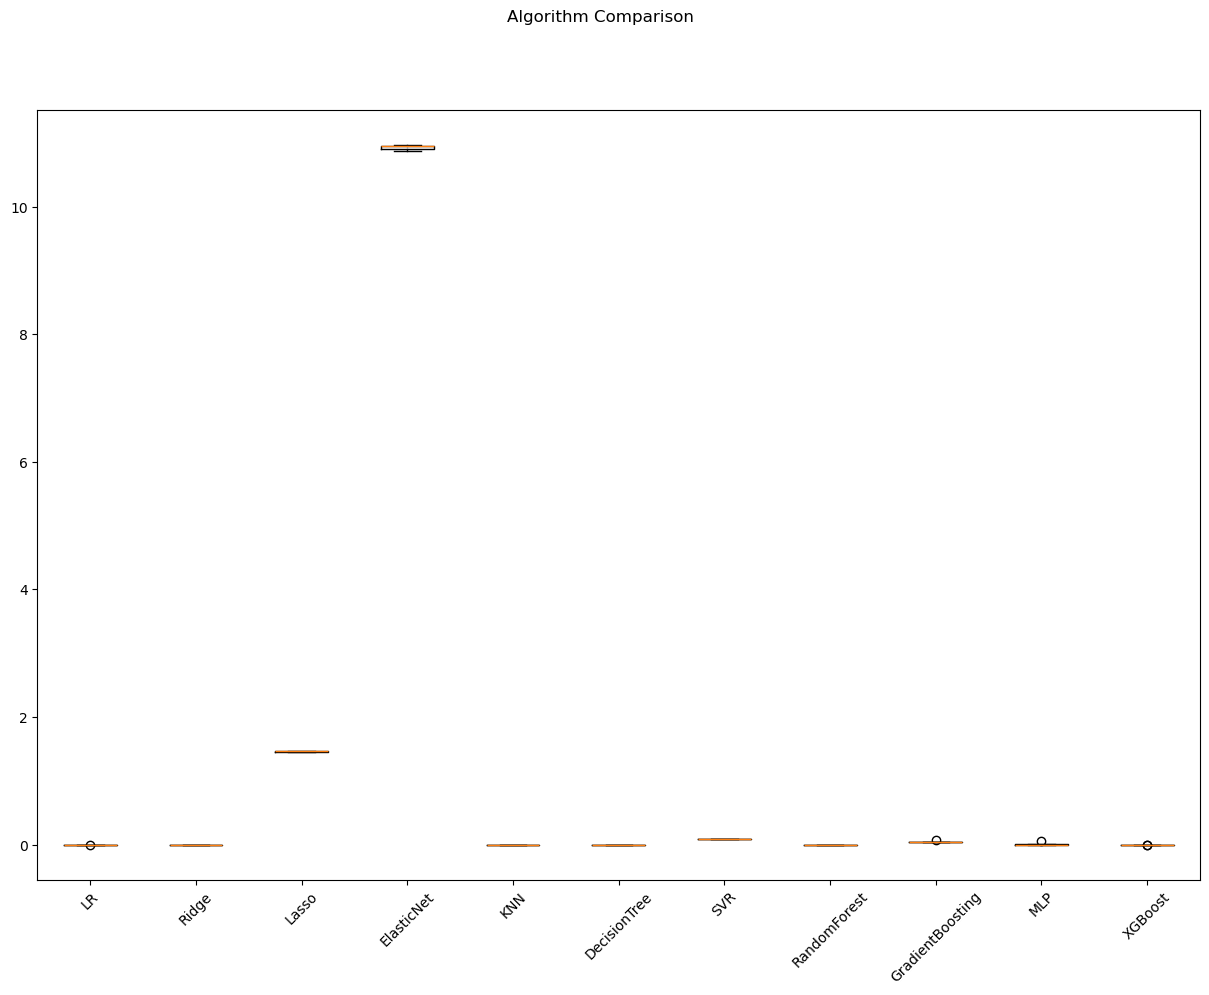


Models performance:
KNN - Mean Absolute Error: 0.0
DecisionTree - Mean Absolute Error: 0.0
RandomForest - Mean Absolute Error: 0.0
LR - Mean Absolute Error: 6.348357886889212e-11
XGBoost - Mean Absolute Error: 2.896869155057386e-06
Ridge - Mean Absolute Error: 0.00011656979060435019
MLP - Mean Absolute Error: 0.0033033359751068465
GradientBoosting - Mean Absolute Error: 0.03650487193925271
SVR - Mean Absolute Error: 0.09250309449311922
Lasso - Mean Absolute Error: 1.4580894202125017
ElasticNet - Mean Absolute Error: 10.927111979730267


In [145]:
import time
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score, mean_squared_error
from math import sqrt

results = []
models_stats = []
names = []
scoring = 'neg_mean_absolute_error' # Change to 'r2' for R2, 'neg_mean_squared_error' for MSE, or 'neg_root_mean_squared_error' for RMSE

for name, model in tqdm(models):
    start = time.time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_train, y_train)
    train_time = time.time() - start
    cv_results = -1 * cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    
    # Make predictions
    start = time.time()
    y_pred = model.predict(X_test)
    predict_time = time.time() - start

    # Coefficients are not available for all models
    if hasattr(model, 'coef_'):
        print(f"Coefficients for {name}: ", model.coef_)

    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print("\tMean Squared Error:", mean_squared_error(y_test, y_pred))
    print("\tRoot Mean Squared Error:", sqrt(mean_squared_error(y_test, y_pred)))
    print()

    model_stats = {
        'name': name,
        'mean_score': cv_results.mean(),
        'std_score': cv_results.std(),
        'explained_variance': explained_variance_score(y_test, y_pred),
        'mean_absolute_error': mean_absolute_error(y_test, y_pred),
        'r2_score': r2_score(y_test, y_pred),
        'mean_squared_error': mean_squared_error(y_test, y_pred),
        'root_mean_squared_error': sqrt(mean_squared_error(y_test, y_pred)),
    }

    models_stats.append(model_stats)

# Boxplot to compare algorithms
fig = pyplot.figure(figsize=(15, 10))  
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names, rotation = 45)
pyplot.show()

# Sorting the models based on mean absolute error
models_stats.sort(key=lambda x: x['mean_absolute_error'])

print("\nModels performance:")
for model in models_stats:
    print(f"{model['name']} - Mean Absolute Error: {model['mean_absolute_error']}")

In [146]:
# Fit the model
lr = LinearRegression().fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate predictions
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 5.451858769533616e-21
R2 Score: 1.0


In [147]:
# Print out the features used in the model
print("Features used in the model: ", X_train.columns.tolist())

# Now let's create new data for prediction
# This should have the same features as the original data
# For illustration, let's assume we have three features: 'Feature1', 'Feature2', 'Feature3'

# new_data = pd.DataFrame({
#     'Feature1': [10, 20, 30],
#     'Feature2': [1, 2, 3],
#     'Feature3': [5, 10, 15],
    # add more features here as needed
# })


Features used in the model:  ['E1_combined_numeric', 'E2_combined_numeric']


In [148]:
new_data = pd.DataFrame({
    'E1_combined_numeric': [0],
    'E2_combined_numeric': [2],
    # add more features here as needed
})

print("New data: ")
print(new_data)

New data: 
   E1_combined_numeric  E2_combined_numeric
0                    0                    2


In [149]:
# Get current hyperparameters
model = DecisionTreeRegressor()  # Replace with your best model if it's not XGBoost
print("Current hyperparameters: ", model.get_params())
# Fitting the model with your data
model.fit(X_train, y_train)

Current hyperparameters:  {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


DecisionTreeRegressor()

In [150]:
new_data_preprocessed = pd.get_dummies(new_data)

# Use the existing model to make predictions
y_new_pred = model.predict(new_data_preprocessed)
print("Predictions on new data: ", y_new_pred)

Predictions on new data:  [50.]


In [151]:
vaccine

,E1_combined_numeric,E2_combined_numeric,EconomicSupportIndex
0,0.0,0,0.0
1,0.0,0,0.0
2,0.0,0,0.0
3,0.0,0,0.0
4,0.0,0,0.0
...,...,...,...
390904,0.0,0,0.0
390905,0.0,0,0.0
390906,0.0,0,0.0
390907,0.0,0,0.0


In [152]:
vaccine1 = pd.read_csv("OxCGRT_simplified_v1.csv")

/var/folders/r0/jpvr7x216q569bknc6r4kfpm0000gn/T/ipykernel_3067/2464975989.py:1: DtypeWarning: Columns (2,3,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  vaccine1 = pd.read_csv("OxCGRT_simplified_v1.csv")


In [153]:
# Dropping unnecessary columns related to country and region identifiers, combined measures, and vaccination statistics.
vaccine1.drop(['CountryName', 'CountryCode', 'RegionName', 'RegionCode', 'Jurisdiction', 
              'C1M_combined', 'C2M_combined', 'C3M_combined', 'C4M_combined', 
              'C5M_combined', 'C6M_combined', 'C7M_combined', 'C8EV_combined'], 
             axis=1, inplace=True)

# Dropping columns related to specific combined measures and vaccination statistics.
vaccine1.drop(['E1_combined', 'E2_combined', 'H1_combined', 'H2_combined', 'H3_combined', 
              'H6M_combined', 'H7_combined', 'H8M_combined', 'MajorityVaccinated'], 
             axis=1, inplace=True)

# Dropping redundant columns for vaccination statistics.
vaccine1.drop(['PopulationVaccinated'], axis=1, inplace=True)

# Dropping the column containing date information, as it may not be relevant for further analysis.
vaccine1.drop(['Date'], axis=1, inplace=True)

In [154]:
vaccine1

,C1M_combined_numeric,C2M_combined_numeric,C3M_combined_numeric,C4M_combined_numeric,C5M_combined_numeric,C6M_combined_numeric,C7M_combined_numeric,C8EV_combined_numeric,E1_combined_numeric,E2_combined_numeric,...,V1..summary.,V2..summary.,V3..summary.,V4..summary.,ConfirmedCases,ConfirmedDeaths,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,...,0,0,0,NaN,0.0,0.0,0.00,0.00,0.00,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,...,0,0,0,NaN,0.0,0.0,0.00,0.00,0.00,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,...,0,0,0,NaN,0.0,0.0,0.00,0.00,0.00,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,...,0,0,0,NaN,0.0,0.0,0.00,0.00,0.00,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,...,0,0,0,NaN,0.0,0.0,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390904,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1,0.0,0,...,2,3,5,1.0,259981.0,5637.0,29.48,36.44,41.65,0.0
390905,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1,0.0,0,...,2,3,5,1.0,259981.0,5637.0,29.48,36.44,41.65,0.0
390906,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1,0.0,0,...,2,3,5,1.0,259981.0,5637.0,29.48,36.44,41.65,0.0
390907,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1,0.0,0,...,2,3,5,1.0,259981.0,5637.0,29.48,36.44,41.65,0.0


In [155]:
vaccine1 = vaccine1.iloc[:, [0,1,2,3,4,5,6,7,12,-4]]

In [156]:
vaccine1

,C1M_combined_numeric,C2M_combined_numeric,C3M_combined_numeric,C4M_combined_numeric,C5M_combined_numeric,C6M_combined_numeric,C7M_combined_numeric,C8EV_combined_numeric,H3_combined_numeric,StringencyIndex_Average
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...
390904,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1,1,29.48
390905,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1,1,29.48
390906,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1,1,29.48
390907,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1,1,29.48


In [157]:
vaccine1.isnull().sum()

C1M_combined_numeric       0
C2M_combined_numeric       0
C3M_combined_numeric       0
C4M_combined_numeric       0
C5M_combined_numeric       0
C6M_combined_numeric       0
C7M_combined_numeric       0
C8EV_combined_numeric      0
H3_combined_numeric        0
StringencyIndex_Average    0
dtype: int64

In [158]:
X = vaccine1.drop(['StringencyIndex_Average'], axis=1)
y = vaccine1['StringencyIndex_Average']

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
models = []
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DecisionTree', DecisionTreeRegressor()))
#models.append(('SVR', SVR()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('GradientBoosting', GradientBoostingRegressor()))
models.append(('MLP', MLPRegressor()))
models.append(('XGBoost', XGBRegressor()))

 10%|████▍                                       | 1/10 [00:00<00:04,  1.88it/s]

Coefficients for LR:  [4.05198666 3.68667432 5.32018627 2.80771317 5.18307358 3.75173731
 5.28247417 2.78159462 1.35887556]
LinearRegression()
	Training time: 0.044s
	Prediction time: 0.004s
	Explained variance: 0.9804061700379557
	Mean absolute error: 2.120541426182424
	R2 score: 0.9804061700077541
	Mean Squared Error: 11.80565154305396
	Root Mean Squared Error: 3.4359353228857437



 20%|████████▊                                   | 2/10 [00:00<00:03,  2.65it/s]

Coefficients for Ridge:  [4.05199381 3.68668703 5.32013515 2.80773169 5.18302579 3.75173543
 5.28245441 2.78160244 1.35887237]
Ridge()
	Training time: 0.013s
	Prediction time: 0.001s
	Explained variance: 0.9804061696470391
	Mean absolute error: 2.12053916368399
	R2 score: 0.9804061696167667
	Mean Squared Error: 11.805651778631173
	Root Mean Squared Error: 3.435935357167124



 30%|█████████████▏                              | 3/10 [00:04<00:12,  1.81s/it]

Coefficients for Lasso:  [4.47010928 3.80008781 3.45921299 3.73233252 2.77116375 3.10130514
 4.69541207 3.08567865 0.        ]
Lasso()
	Training time: 0.689s
	Prediction time: 0.002s
	Explained variance: 0.9720046075223449
	Mean absolute error: 2.841684440446434
	R2 score: 0.9720045495900986
	Mean Squared Error: 16.867786056168537
	Root Mean Squared Error: 4.107041034147156



 40%|█████████████████▌                          | 4/10 [00:06<00:11,  1.85s/it]

Coefficients for ElasticNet:  [3.91742498 3.41605935 2.97468302 4.00183005 2.35472697 2.92806132
 3.32520307 3.16139659 0.82787278]
ElasticNet()
	Training time: 0.196s
	Prediction time: 0.003s
	Explained variance: 0.9589969314610346
	Mean absolute error: 3.766288453390682
	R2 score: 0.9589967111617181
	Mean Squared Error: 24.705253660745004
	Root Mean Squared Error: 4.970437974740758



 50%|██████████████████████                      | 5/10 [00:53<01:31, 18.26s/it]

KNeighborsRegressor()
	Training time: 0.142s
	Prediction time: 9.949s
	Explained variance: 0.9894707317621614
	Mean absolute error: 1.1569705558824286
	R2 score: 0.9894457214963067
	Mean Squared Error: 6.359151546801053
	Root Mean Squared Error: 2.521735820184393



 60%|██████████████████████████▍                 | 6/10 [00:56<00:51, 12.95s/it]

DecisionTreeRegressor()
	Training time: 0.256s
	Prediction time: 0.009s
	Explained variance: 0.9906195045050925
	Mean absolute error: 1.089038639573828
	R2 score: 0.9906195002584497
	Mean Squared Error: 5.651927739103386
	Root Mean Squared Error: 2.37737833318624



 70%|██████████████████████████████▊             | 7/10 [03:56<03:22, 67.56s/it]

RandomForestRegressor()
	Training time: 17.432s
	Prediction time: 0.816s
	Explained variance: 0.9906425357994203
	Mean absolute error: 1.0942859173533666
	R2 score: 0.9906425336554376
	Mean Squared Error: 5.6380496836747005
	Root Mean Squared Error: 2.3744577662436326



 80%|███████████████████████████████████▏        | 8/10 [05:31<02:32, 76.41s/it]

GradientBoostingRegressor()
	Training time: 9.564s
	Prediction time: 0.088s
	Explained variance: 0.9842757945427958
	Mean absolute error: 2.065381460749278
	R2 score: 0.9842757652227587
	Mean Squared Error: 9.474147557406777
	Root Mean Squared Error: 3.078010324447723



/Users/kaushikpatil/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kaushikpatil/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kaushikpatil/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kaushikpatil/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/k

MLPRegressor()
	Training time: 102.620s
	Prediction time: 0.047s
	Explained variance: 0.9871629190922099
	Mean absolute error: 1.5955165274509167
	R2 score: 0.9871598965808972
	Mean Squared Error: 7.736404102857446
	Root Mean Squared Error: 2.781439214302093



100%|██████████████████████████████████████████| 10/10 [40:50<00:00, 245.03s/it]

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
	Training time: 242.473s
	Prediction time: 0.018s
	Explained variance: 0.9889407277606327
	Mean absolute error: 1.5495102409824761
	R2 score: 0.9889407265796413
	Mean Squared Error: 6.663420493685079
	Root Mean Squared Error: 2.581360202235457



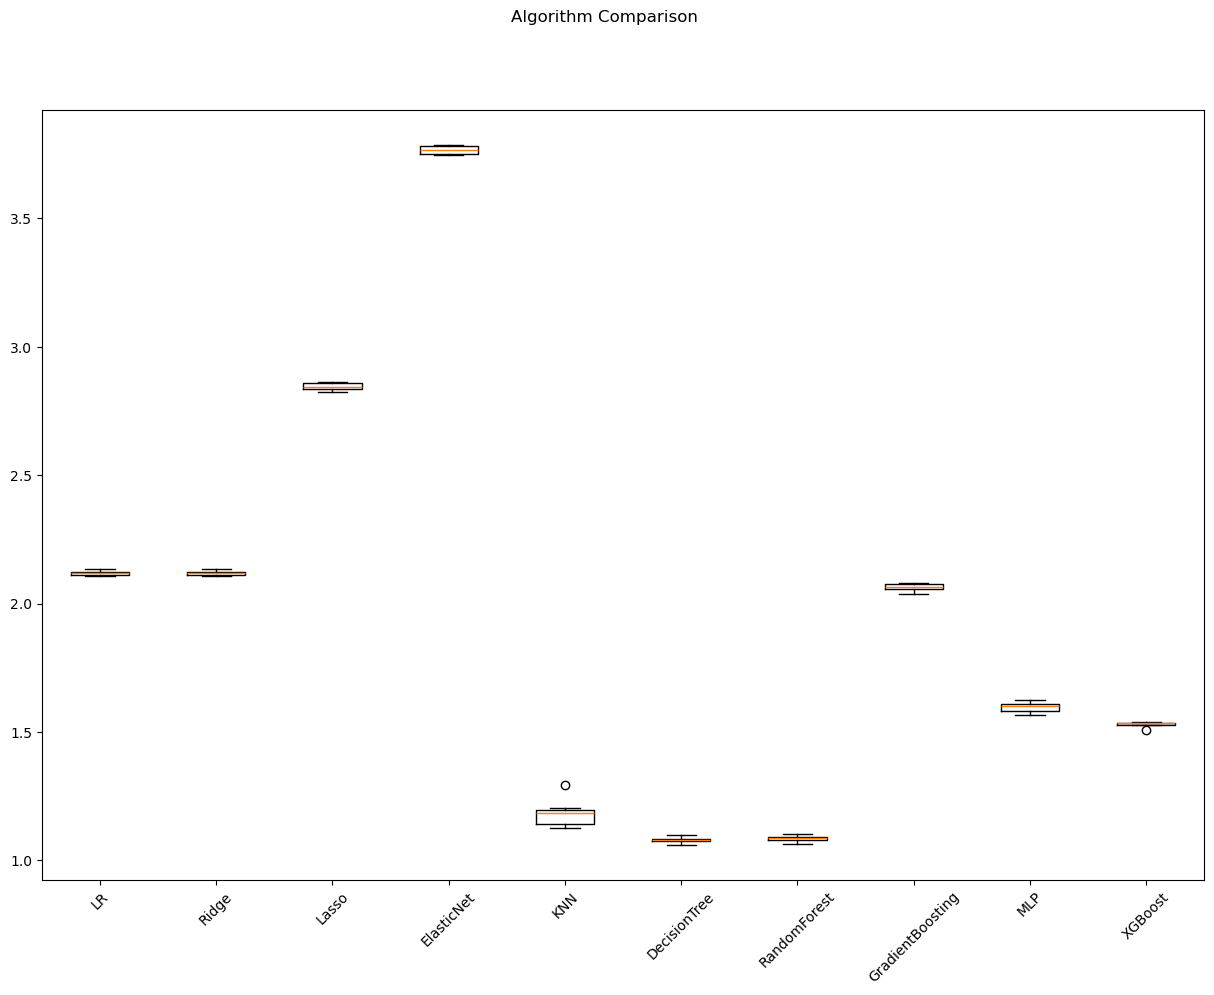


Models performance:
DecisionTree - Mean Absolute Error: 1.089038639573828
RandomForest - Mean Absolute Error: 1.0942859173533666
KNN - Mean Absolute Error: 1.1569705558824286
XGBoost - Mean Absolute Error: 1.5495102409824761
MLP - Mean Absolute Error: 1.5955165274509167
GradientBoosting - Mean Absolute Error: 2.065381460749278
Ridge - Mean Absolute Error: 2.12053916368399
LR - Mean Absolute Error: 2.120541426182424
Lasso - Mean Absolute Error: 2.841684440446434
ElasticNet - Mean Absolute Error: 3.766288453390682


In [162]:
import time
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score, mean_squared_error
from math import sqrt

results = []
models_stats = []
names = []
scoring = 'neg_mean_absolute_error' # Change to 'r2' for R2, 'neg_mean_squared_error' for MSE, or 'neg_root_mean_squared_error' for RMSE

for name, model in tqdm(models):
    start = time.time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_train, y_train)
    train_time = time.time() - start
    cv_results = -1 * cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    
    # Make predictions
    start = time.time()
    y_pred = model.predict(X_test)
    predict_time = time.time() - start

    # Coefficients are not available for all models
    if hasattr(model, 'coef_'):
        print(f"Coefficients for {name}: ", model.coef_)

    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print("\tMean Squared Error:", mean_squared_error(y_test, y_pred))
    print("\tRoot Mean Squared Error:", sqrt(mean_squared_error(y_test, y_pred)))
    print()

    model_stats = {
        'name': name,
        'mean_s core': cv_results.mean(),
        'std_score': cv_results.std(),
        'explained_variance': explained_variance_score(y_test, y_pred),
        'mean_absolute_error': mean_absolute_error(y_test, y_pred),
        'r2_score': r2_score(y_test, y_pred),
        'mean_squared_error': mean_squared_error(y_test, y_pred),
        'root_mean_squared_error': sqrt(mean_squared_error(y_test, y_pred)),
    }

    models_stats.append(model_stats)

# Boxplot to compare algorithms
fig = pyplot.figure(figsize=(15, 10))  
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names, rotation = 45)
pyplot.show()

# Sorting the models based on mean absolute error
models_stats.sort(key=lambda x: x['mean_absolute_error'])

print("\nModels performance:")
for model in models_stats:
    print(f"{model['name']} - Mean Absolute Error: {model['mean_absolute_error']}")

In [163]:
# Fit the model
lr = DecisionTreeRegressor().fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate predictions
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 5.654733869641528
R2 Score: 0.9906148429259425


In [164]:
# Print out the features used in the model
print("Features used in the model: ", X_train.columns.tolist())



Features used in the model:  ['C1M_combined_numeric', 'C2M_combined_numeric', 'C3M_combined_numeric', 'C4M_combined_numeric', 'C5M_combined_numeric', 'C6M_combined_numeric', 'C7M_combined_numeric', 'C8EV_combined_numeric', 'H3_combined_numeric']


In [165]:
# Now let's create new data for prediction
# This should have the same features as the original data
# For illustration, let's assume we have three features: 'Feature1', 'Feature2', 'Feature3'

# new_data = pd.DataFrame({
#     'Feature1': [10, 20, 30],
#     'Feature2': [1, 2, 3],
#     'Feature3': [5, 10, 15],
    # add more features here as needed
# })
new_data = pd.DataFrame({
    'C1M_combined_numeric': [1],
    'C2M_combined_numeric': [2],
    'C3M_combined_numeric': [2],
    'C4M_combined_numeric': [4],
    'C5M_combined_numeric': [0],
    'C6M_combined_numeric': [0],
    'C7M_combined_numeric': [2],
    'C8EV_combined_numeric': [1],
    'H3_combined_numeric': [0],
    # add more features here as needed
})

print("New data: ")
print(new_data)

New data: 
   C1M_combined_numeric  C2M_combined_numeric  C3M_combined_numeric  \
0                     1                     2                     2   

   C4M_combined_numeric  C5M_combined_numeric  C6M_combined_numeric  \
0                     4                     0                     0   

   C7M_combined_numeric  C8EV_combined_numeric  H3_combined_numeric  
0                     2                      1                    0  


In [166]:
# Get current hyperparameters
model = DecisionTreeRegressor()  # Replace with your best model if it's not XGBoost
print("Current hyperparameters: ", model.get_params())
# Fitting the model with your data
model.fit(X_train, y_train)

Current hyperparameters:  {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


DecisionTreeRegressor()

In [167]:

# Apply the same preprocessing steps as you did for your training data
# In this case, convert categorical variables to dummy/indicator variables
new_data_preprocessed = pd.get_dummies(new_data)

# Use the existing model to make predictions
y_new_pred = model.predict(new_data_preprocessed)
print("Predictions on new data: ", y_new_pred)

Predictions on new data:  [59.26]
